# Analisis Extraksi Data Enose Kakao (Encoder)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from snhlib.dataviz import CalcLDA, CalcPCA
from snhlib.multitools import DataGeNose
from snhlib.optimize import AutoEncoder

# import warnings
# warnings.filterwarnings("ignore")

%config InlineBackend.figure_formats = ['svg']  # svg | retina == png high res
%matplotlib inline

In [2]:
COLS = [f"S{i+1}" for i in range(10)]


def convert_data(df: pd.DataFrame) -> np.ndarray:
    select = [i for i in range(df.shape[0]) if i % 10 == 0][20:]
    new_df = df.loc[select].reset_index(drop=True)
    new_df = new_df[COLS]
    return new_df.transpose().to_numpy().flatten()

## Extract data

In [3]:
list_rawdata = pd.read_csv("data/list_rawdata_butter.csv")
list_rawdata.head()

,path,label,group,names
0,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK65-1.csv,0,B,TK65-1
1,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK39-1.csv,0,B,TK39-1
2,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK41-1.csv,0,B,TK41-1
3,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK26-1.csv,0,B,TK26-1
4,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK42-1.csv,0,B,TK42-1


In [13]:
data_df = pd.DataFrame()
for i, item in enumerate(list_rawdata.path.values):
    data = DataGeNose(item)
    x = convert_data(data.open)
    x = pd.DataFrame(x).transpose()
    x.columns = [str(j) for j in x.columns]
    x["label"] = list_rawdata.loc[i, "label"]
    x["group"] = list_rawdata.loc[i, "group"]
    x["names"] = list_rawdata.loc[i, "names"]
    x.index = [i]
    data_df = pd.concat([data_df, x], axis=0)
    
data_df.to_parquet("data/data_covert_for_encoding.parquet", index=False)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1203,1204,1205,1206,1207,1208,1209,label,group,names
0,1489.04500,1489.32750,1504.72375,1552.74875,1608.40125,1654.44875,1689.76125,1715.75125,1733.97250,1745.97875,...,2909.250,2910.375,2911.375,2912.250,2913.125,2913.875,2914.125,0,B,TK65-1
1,1821.12375,1821.12375,1836.94375,1885.25125,1939.49125,1986.38625,2024.66500,2054.04500,2076.36250,2093.17125,...,3125.625,3126.375,3126.750,3126.625,3126.375,3125.875,3125.250,0,B,TK39-1
2,1762.92875,1763.35250,1777.90125,1822.81875,1873.81000,1920.28125,1958.98375,1990.20000,2016.19000,2037.09500,...,3104.500,3104.375,3104.125,3103.625,3103.375,3103.125,3103.125,0,B,TK41-1
3,1662.07625,1662.64125,1672.81125,1698.80125,1728.46375,1755.86625,1779.03125,1798.52375,1814.20250,1827.05625,...,3027.750,3027.750,3027.375,3027.250,3027.125,3027.125,3027.250,0,B,TK26-1
4,1720.41250,1721.54250,1738.77500,1790.75500,1849.23250,1899.80000,1940.62125,1972.82625,1997.96875,2017.03750,...,3081.750,3081.750,3081.625,3081.875,3081.875,3082.125,3082.250,0,B,TK42-1


## Analisis semua data

In [5]:
X = data_df.values[:, :-3]
y = data_df.label.values

### PCA

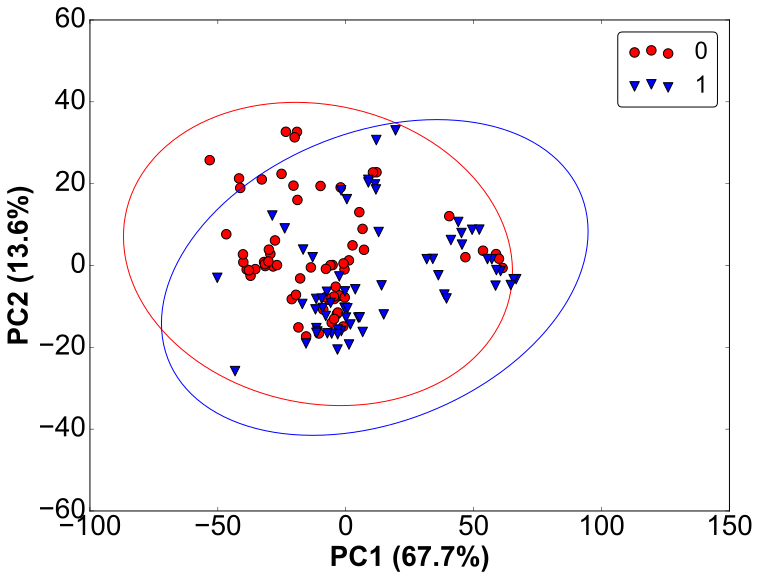

In [6]:
pca = CalcPCA()
pca.fit(X, y)
fig = pca.plotpc()

### LDA

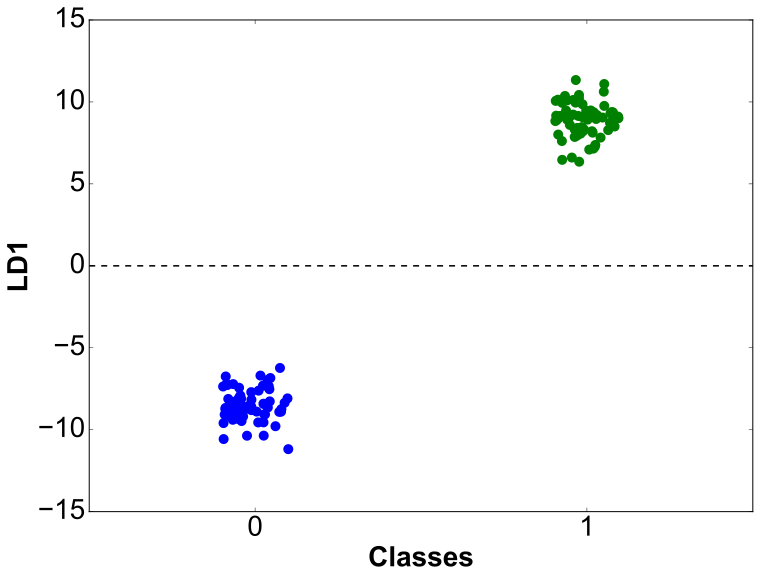

In [7]:
lda = CalcLDA()
lda.fit(X, y)
fig = lda.plotlda()

### Validation

In [8]:
model = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis())
score = cross_val_predict(model, X, y)
print(classification_report(y, score))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        69
           1       0.87      0.94      0.91        66

    accuracy                           0.90       135
   macro avg       0.91      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135

